In [1]:
import duckdb

In [2]:
con = duckdb.connect()

In [3]:
con.execute("CREATE TABLE my_test_table AS SELECT * FROM read_csv_auto('E:\Downloads off Web\CDC Data 2015.csv')")


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Bryan Rowe\AppData\Local\Temp\ipykernel_8964\895358532.py:1: SyntaxWarning: invalid escape sequence '\D'
  con.execute("CREATE TABLE my_test_table AS SELECT * FROM read_csv_auto('E:\Downloads off Web\CDC Data 2015.csv')")


In [4]:
result = con.execute("SELECT * FROM my_test_table").fetchdf()


In [5]:
print(result)


#All the previous lines are the basics to setting up a DuckDB database in Python

        STATE  FMONTH     IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0           1       1   1292015       1    29   2015      1200  2015000001   
1           1       1   1202015       1    20   2015      1100  2015000002   
2           1       1   2012015       2     1   2015      1200  2015000003   
3           1       1   1142015       1    14   2015      1100  2015000004   
4           1       1   1142015       1    14   2015      1100  2015000005   
...       ...     ...       ...     ...   ...    ...       ...         ...   
441451     72      11  12162015      12    16   2015      1100  2015005416   
441452     72      11  12142015      12    14   2015      1100  2015005417   
441453     72      11  12232015      12    23   2015      1200  2015005418   
441454     72      11  12152015      12    15   2015      1100  2015005419   
441455     72      11  12152015      12    15   2015      1100  2015005420   

               PSU  CTELENUM  ...  PAREC1 PASTAE1  LMTACT1  LMT

In [56]:
Effects_from_income = con.execute("SELECT INCOMG, GENHLTH, MENTHLTH, POORHLTH, ADDEPEV2, QLMENTL2, QLSTRES2, QLHLTH2, LSATISFY, ADPLEASR, ADDOWN, ADENERGY, ADFAIL FROM my_test_table").fetchdf()

# How does income affect stress and mental health in general?

#Chose these variables because they looked interesting

In [57]:
print(Effects_from_income)

        INCOMG  GENHLTH  MENTHLTH  POORHLTH  ADDEPEV2 QLMENTL2 QLSTRES2  \
0            2      5.0        18      10.0         1     None     None   
1            1      3.0        88       NaN         2     None     None   
2            9      4.0        88      88.0         2     None     None   
3            5      5.0        30      30.0         1     None     None   
4            9      5.0        88      30.0         2     None     None   
...        ...      ...       ...       ...       ...      ...      ...   
441451       2      4.0        88       NaN         2     None     None   
441452       1      1.0        88       NaN         2     None     None   
441453       3      4.0        20      88.0         2     None     None   
441454       1      3.0        88       NaN         2     None     None   
441455       1      2.0        88       NaN         2     None     None   

       QLHLTH2 LSATISFY ADPLEASR ADDOWN ADENERGY ADFAIL  
0         None     None     None   None  

In [74]:
Refined_effects_from_income = con.execute("SELECT INCOMG, INCOME2, GENHLTH, MENTHLTH, POORHLTH, ADDEPEV2 FROM my_test_table").fetchdf()

#Dropped variables that had no values

In [75]:
print(Refined_effects_from_income)

        INCOMG  INCOME2  GENHLTH  MENTHLTH  POORHLTH  ADDEPEV2
0            2      3.0      5.0        18      10.0         1
1            1      1.0      3.0        88       NaN         2
2            9     99.0      4.0        88      88.0         2
3            5      8.0      5.0        30      30.0         1
4            9     77.0      5.0        88      30.0         2
...        ...      ...      ...       ...       ...       ...
441451       2      4.0      4.0        88       NaN         2
441452       1      2.0      1.0        88       NaN         2
441453       3      5.0      4.0        20      88.0         2
441454       1      1.0      3.0        88       NaN         2
441455       1      2.0      2.0        88       NaN         2

[441456 rows x 6 columns]


In [87]:
#Dropping null, blank, and missing values for data cleaning purposes

Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.ADDEPEV2 != 7]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.ADDEPEV2 != 9]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.POORHLTH != 77]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.POORHLTH != 99]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.MENTHLTH != 77]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.MENTHLTH != 99]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.GENHLTH != 7]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.GENHLTH != 9]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.INCOME2 != 77]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.INCOME2 != 99]
Cleaned_effects_from_income = Refined_effects_from_income[Refined_effects_from_income.INCOMG != 9]
Cleaned_effects_from_income.dropna(inplace=True)


C:\Users\Bryan Rowe\AppData\Local\Temp\ipykernel_8964\1395873649.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_effects_from_income.dropna(inplace=True)


In [88]:
print(Cleaned_effects_from_income)

        INCOMG  INCOME2  GENHLTH  MENTHLTH  POORHLTH  ADDEPEV2
0            2      3.0      5.0        18      10.0         1
3            5      8.0      5.0        30      30.0         1
6            2      4.0      2.0         3      88.0         2
7            2      3.0      5.0        88       8.0         2
9            5      8.0      2.0        88       2.0         2
...        ...      ...      ...       ...       ...       ...
441442       1      2.0      4.0        88       2.0         1
441444       4      6.0      1.0        88      88.0         1
441448       5      8.0      3.0        14      88.0         1
441450       5      7.0      3.0        88       2.0         2
441453       3      5.0      4.0        20      88.0         2

[187523 rows x 6 columns]


In [89]:
import seaborn as sns

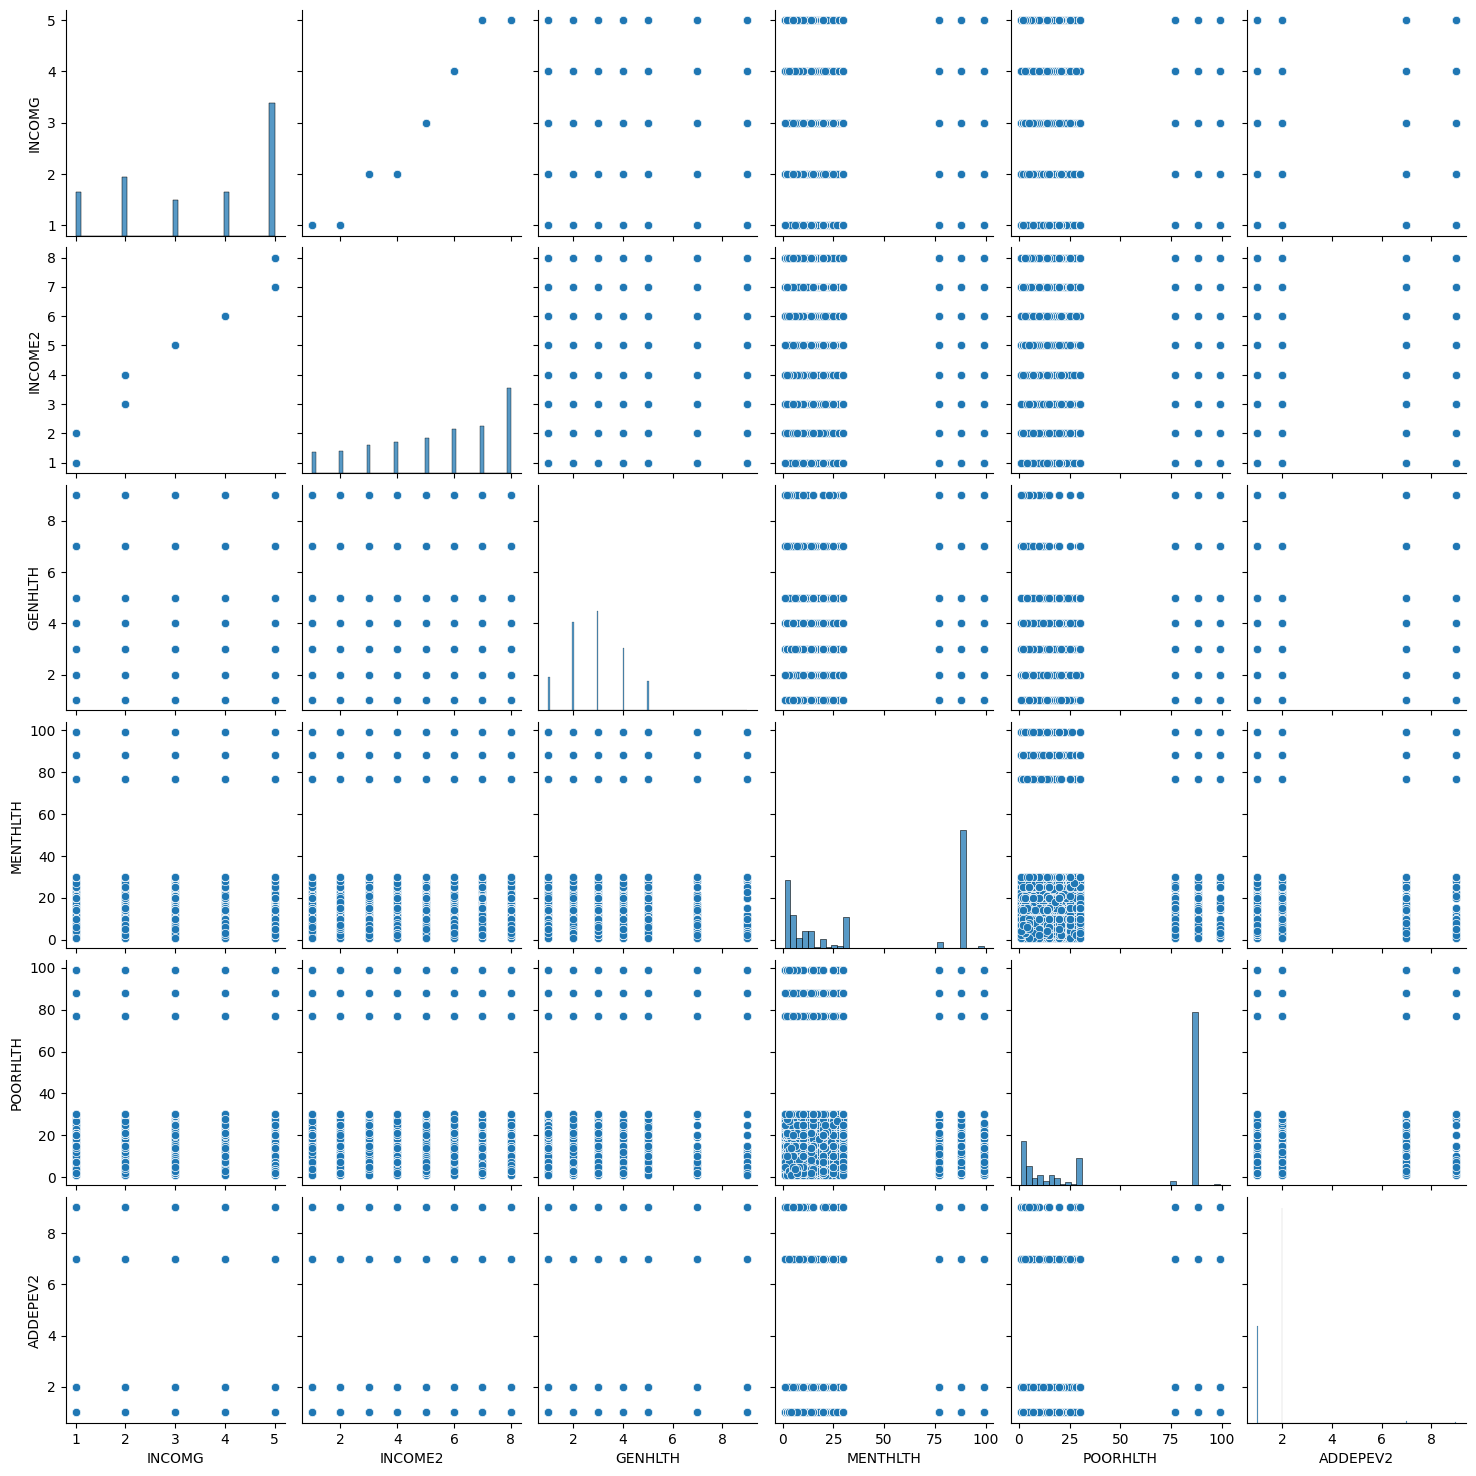

In [90]:
sns.pairplot(Cleaned_effects_from_income)

In [91]:
#ADDEPEV2 does not seem to be good variable because its binary

#Will run both income variables separately to see if there makes a difference 

#Seems ripe for series of logistic regressions 


In [94]:
import matplotlib.pyplot as mp


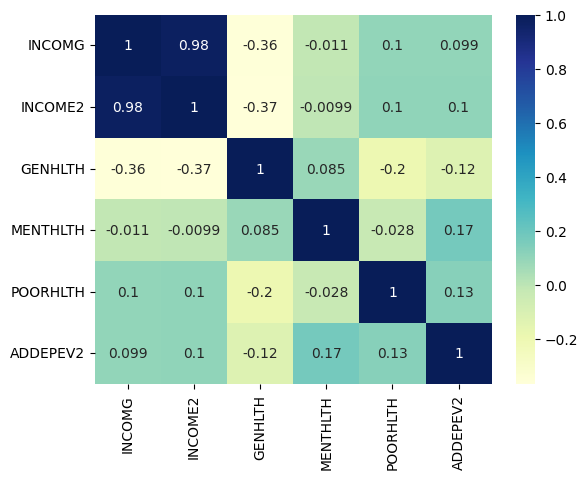

In [95]:
dataplot = sns.heatmap(Cleaned_effects_from_income.corr(numeric_only=True), cmap="YlGnBu", annot=True)

mp.show()

In [ ]:
#General health seems to have something potentially going on

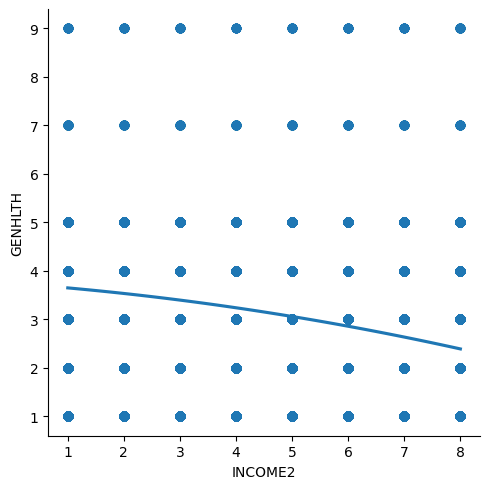

In [109]:
sns.lmplot(x ="INCOME2", y ="GENHLTH", data = Cleaned_effects_from_income, order = 2, ci = None) 
plt.show()

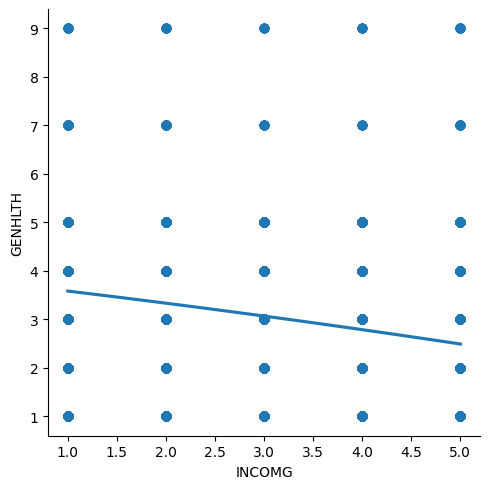

In [110]:
sns.lmplot(x ="INCOMG", y ="GENHLTH", data = Cleaned_effects_from_income, order = 2, ci = None) 
plt.show()

In [ ]:
#INCOME2 shows a slight bend, INCOMG shows a flat line. Both show decrease in general health the higher the income goes 

#I feel like the relationship is more complicated than simple regression

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [152]:
X = Cleaned_effects_from_income.drop('INCOME2',axis = 1)
Y= Cleaned_effects_from_income['INCOME2']

In [153]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 28)

In [181]:
model = DecisionTreeRegressor(random_state = 0, max_depth=5)

In [182]:
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [183]:
y_pred = model.predict(x_test)

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.419


In [184]:
import matplotlib.pyplot as plt

In [185]:
from sklearn import tree

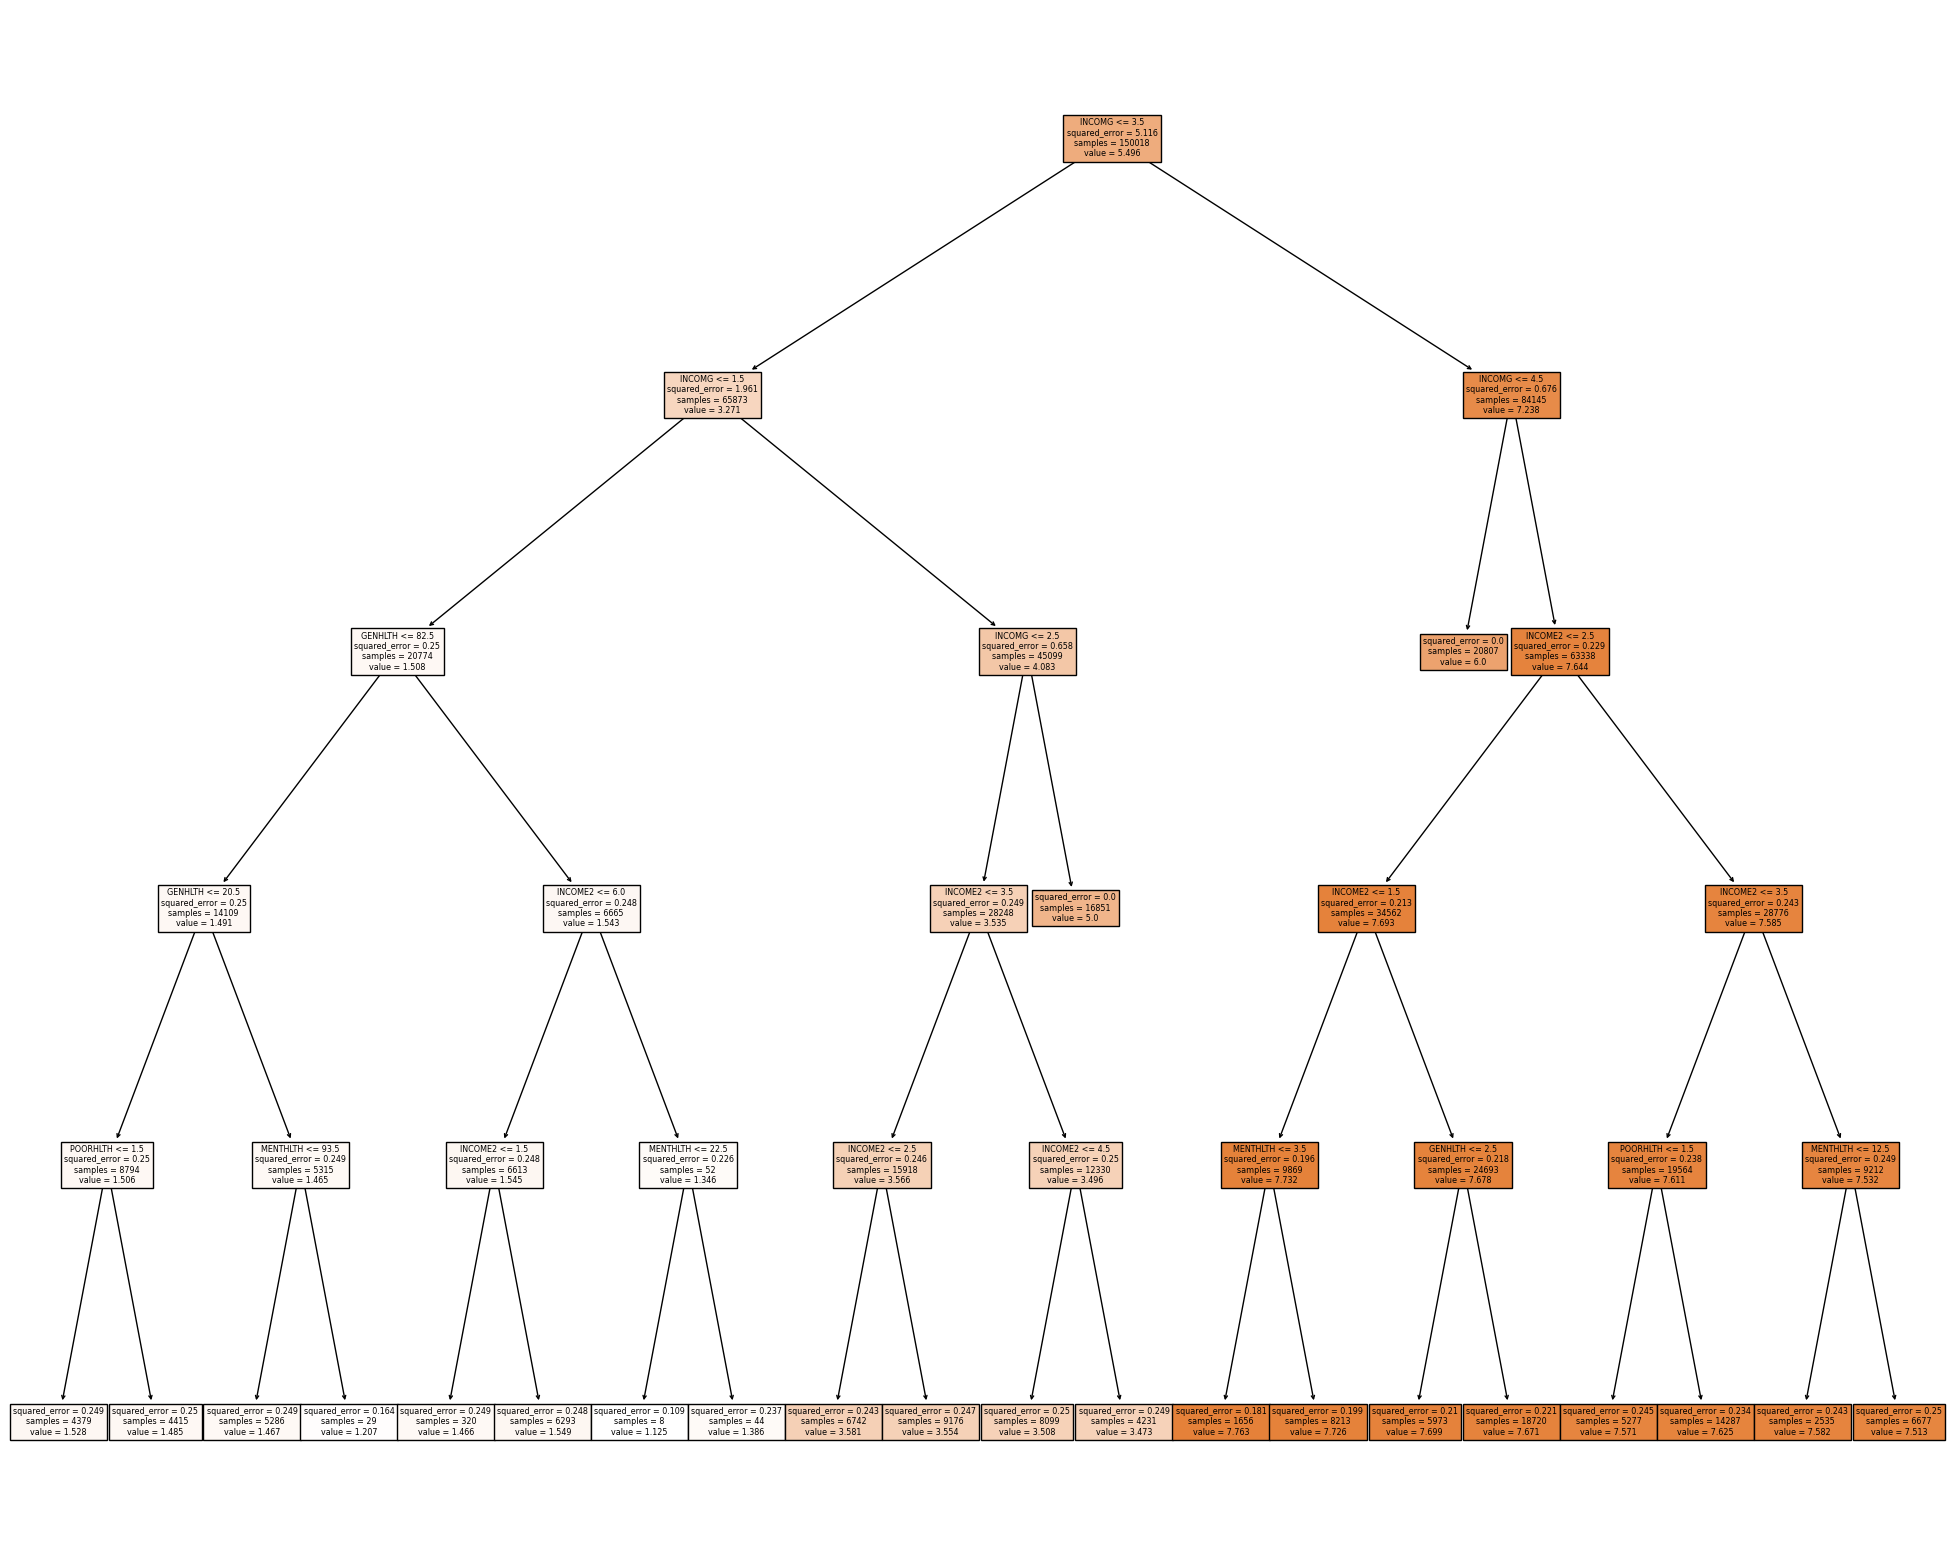

In [188]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=Cleaned_effects_from_income.columns, class_names=Cleaned_effects_from_income.columns, filled=True)

In [189]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9645107929364074

In [ ]:
#R squared score of approximately 96.5%